In [4]:
from glob import glob
from PIL import Image
import numpy as np
def load_wld(path):
    with open(path, 'r') as file:
        wld_content = file.read()
        output_list = wld_content.strip().split('\n')
        wld = [float(item) for item in output_list]
    return wld

dbz_dir = '/home/qixiang/liucs/huabei/dataset/china_radar_map/2024/2/10'

fl = sorted(glob(f'{dbz_dir}/*png'))
dbz = np.stack([Image.open(f) for f in fl],axis=0,dtype=np.float32)*0.5

h,w = np.array(Image.open(fl[0])).shape
wld = load_wld(glob(f'{dbz_dir}/*.wld')[0]) #通过wld文件读取经纬度信息  #/home/sunhh/china_dbz.wld /home/sunhh/huabei_dbz.wld
lon = wld[0]+np.arange(w)*wld[1]
lat = wld[3]+np.arange(h)*wld[5]

In [17]:
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.shapereader import Reader
from matplotlib.colors import BoundaryNorm, ListedColormap
import frykit.plot as fplt
from copy import deepcopy
from glob import glob
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import frykit.plot as fplt
import frykit.shp as fshp

def draw_dbz(dbz,lon,lat):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置全局为中文黑体
    # plt.rcParams['font.family'] = ['Times New Roman','SimHei'] #设置英文字体为 Times New Roman ,中文为黑体 
    plt.rcParams['axes.unicode_minus'] = False  # 设置-号，如果只设置上一行，负号画图会不显示
    # 设置全局字体大小为15
    fontsize = 12
    plt.rcParams.update({'font.size': fontsize})
    def find_closest_index(lst, target):
        closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
        return closest_index
    lon_min = np.round(lon.min(),1) -0.2
    lat_min = np.round(lat.min(),1) -0.2
    lon_max = np.round(lon.max(),1) +0.2
    lat_max = np.round(lat.max(),1) +0.2

    # lon_min_idx = find_closest_index(lon, lon_min) -1
    # lat_min_idx = find_closest_index(lat, lat_min) -1
    # lon_max_idx = find_closest_index(lon, lon_max) +1
    # lat_max_idx = find_closest_index(lat, lat_max) +1
    X,Y = np.meshgrid(lon,lat)
    Z = dbz

    # 设置地图范围和刻度.
    extents1 = [lon_min, lon_max, lat_min, lat_max]
    # extents1 =[70,140,10,55]
    xticks = np.arange(-180, 181, 5)
    yticks = np.arange(-90, 91, 5)
        
    # 设置投影.
    map_crs = ccrs.PlateCarree()
    data_crs = ccrs.PlateCarree()

    # 设置刻度风格.
    plt.rc('xtick.major', size=fontsize, width=0.9)
    plt.rc('ytick.major', size=fontsize, width=0.9)
    plt.rc('xtick', labelsize=fontsize, top=False, labeltop=False)
    plt.rc('ytick', labelsize=fontsize, right=False, labelright=False)

    # 准备主地图.
    fig = plt.figure(figsize=(15, 9))
    ax1 = fig.add_subplot(projection=map_crs)
    fplt.set_map_ticks(ax=ax1, extents=extents1, xticks=xticks, yticks=yticks)

    # levels = np.linspace(540, 1090, 111)   
    # cticks = np.linspace(540, 1090, 11)
    # 定义颜色列表
    levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
    colors = [(255,255,255),(102,255,255),(86,225,250),(0,162,232),(3,207,14),\
        (26,152,7),(255,242,0),(217,172,113),(255,147,74),(255,0,0),\
        (204,0,0),(155,0,0),(236,21,236),(130,11,130),(184,108,208)]

    # 将颜色值转换为范围从0到1的浮点数
    colors = [(r/255, g/255, b/255) for r, g, b in colors]
    cticks = levels

    cf = ax1.contourf(
        X,
        Y,
        Z,
        levels=levels,
        # cmap='jet_r',
        colors = colors,
        # norm=norm,
        extend='max',
        transform=data_crs,
        transform_first=True,
        zorder=0
    )


    cbar = fig.colorbar(
        cf,
        ax=ax1,
        label='雷达反射率 (dbz)',
        orientation='horizontal',
        shrink=0.6,
        pad=0.07,
        aspect=30,
        ticks=cticks,
        # extendfrac=0,
    )
    cbar.ax.tick_params(length=4, labelsize=fontsize)
    # ax1.set_facecolor('skyblue')
    fplt.add_land(ax1)
    fplt.add_countries(ax1, lw=0.3)
    fplt.add_cn_province(ax1, lw=0.3)
    # fplt.clip_by_cn_border(cf)
    # fplt.clip_by_cn_city(cf, area_name) #指定省的边界

    # 添加比例尺.
    map_scale = fplt.add_map_scale(ax1, 0.05, 0.04, length=500)
    map_scale.set_xticks([0, 250, 500])
    map_scale.tick_params(labelsize=fontsize)
    map_scale.xaxis.get_label().set_fontsize(fontsize*0.8)
    # 设置标题.
    ax1.set_title(
        # f'6小时累计降水 (mm) \n 起报：202312131400  预报：202312141400',
        f'雷达反射率 (dbz)',
        # y=1.1,
        fontsize=fontsize,
        weight='bold',
    )

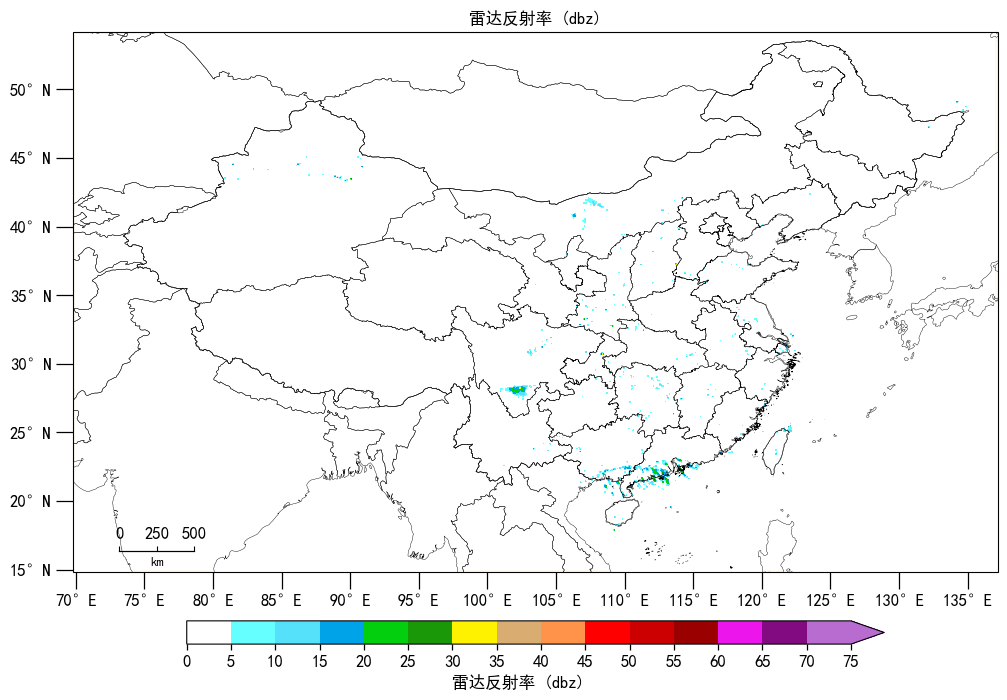

In [18]:
draw_dbz(dbz[1],lon,lat)